# PD-L1 expression

In [1]:
# Libraries
suppressPackageStartupMessages(library(tidyverse))

# Scripts for data analysis
source("summaries.R")

# Global options
options(warn = -1)

# Data
DF <- load("df.Rdata")
DATA <- DATA %>% 
    select(
        patient_id,
        sp_id,
        histo_code,
        pdl1_tumor:pdl1_stroma_location,
        pT_upstage_any_time:grade_prog_next_time,
        bcg
    )

glimpse(DATA)

Observations: 461
Variables: 17
$ patient_id           <int> 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, …
$ sp_id                <fct> 05-S-4662, 05-S-4662, 05-S-4662, 05-S-9869, 07-S…
$ histo_code           <ord> High-grade, High-grade, High-grade, Normal, Low-…
$ pdl1_tumor           <dbl> 1.0, 0.0, 0.0, 0.0, NA, 0.0, 0.0, 10.0, 30.0, NA…
$ pdl1_tumor_count     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ pdl1_tumor_total     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ pdl1_tumor_location  <fct> Membraneous, NA, NA, NA, NA, NA, NA, Membraneous…
$ pdl1_tumor_h         <dbl> 1.0, 0.0, 0.0, 0.0, NA, 0.0, 0.0, 10.0, 30.0, NA…
$ pdl1_stroma          <dbl> 10, 1, 5, 0, 20, NA, NA, 0, 0, 0, NA, 1, NA, NA,…
$ pdl1_stroma_location <fct> NA, NA, NA, Adherent to tumor, Away from tumor, …
$ pT_upstage_any_time  <fct> No stage progression, No stage progression, No s…
$ pT_upstage_next_time <fct> No stage progression, No stage progression, No s…
$ rec_any_time      

## PD-L1 expression in tumor cells 
The analysis of PDL1 expression was carried out at the TMA level.

### Percentage of PD-L1 positivity

In [2]:
DATA %>% summary_num_x(pdl1_tumor)

    N     Mean       SD Median IQR Min Max Missing
1 461 3.419944 14.90858      0   0   0 100     101


### Location of PD-L1 positivity in tumor cells

In [3]:
DATA %>% summary_fct_x(pdl1_tumor_location)

# A tibble: 4 x 3
  Levels          N  Freq
  <fct>       <int> <dbl>
1 Cytoplasmic    19   4.1
2 Membraneous    27   5.9
3 Both           43   9.3
4 <NA>          372  80.7


### Distribution of PD-L1 H-scores

In [4]:
DATA %>% summary_num_x(pdl1_tumor_h)

    N     Mean       SD Median IQR Min Max Missing
1 461 4.985778 22.67138      0   0   0 200     101


## PD-L1 in stromal cells
The analysis of PDL1 expression was carried out at the TMA level.

### Percentage of PD-L1 positivity

In [5]:
DATA %>% summary_num_x(pdl1_stroma)

    N     Mean       SD Median IQR Min Max Missing
1 461 9.581048 16.79313      1  10   0  80     213


### Location of PD-L1 positivity in stromal cells

In [6]:
DATA %>% summary_fct_x(pdl1_stroma_location)

# A tibble: 3 x 3
  Levels                N  Freq
  <fct>             <int> <dbl>
1 Adherent to tumor   173  37.5
2 Away from tumor      45   9.8
3 <NA>                243  52.7


## PD-L1 expression by histology
The analysis of PDL1 expression was carried out at the TMA level.

### Epithelial cells
#### Percentage of PD-L1 positivity

In [7]:
# Recoding levels of histo_code
DATA <- DATA %>% 
    mutate(
        histo_code = fct_collapse(histo_code,
            "Nontumor" = c("Normal", "Papillary hyperplasia"),
            "CIS" = c("CIS", "Dysplasia"),
            "LG" = "Low-grade",
            "HG" = "High-grade"
        ),
        histo_code = fct_relevel(histo_code,
            c("Nontumor", "CIS", "LG", "HG")
        )
    )

DATA %>% summary_bi(pdl1_tumor, histo_code)

# A tibble: 5 x 9
  Levels       N  Mean    SD Median   IQR   Min   Max Missing
  <ord>    <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Nontumor    48 0.654  2.15      0     0     0    10      22
2 CIS         21 0.922  2.88      0     0     0    10       9
3 LG         116 5.00  20.1       0     0     0   100      23
4 HG         168 2.99  15.1       0     0     0   100      33
5 Invasive   108 3.56  11.1       0     1     0    80      14

	Kruskal-Wallis rank sum test

data:  x by y
Kruskal-Wallis chi-squared = 19.176, df = 4, p-value = 0.0007256


	Pairwise comparisons using Wilcoxon rank sum test 

data:  x and y 

         Nontumor CIS    LG     HG    
CIS      1.0000   -      -      -     
LG       1.0000   1.0000 -      -     
HG       1.0000   1.0000 1.0000 -     
Invasive 0.1972   1.0000 0.0017 0.0322

P value adjustment method: bonferroni 


#### Location of PDL1 positivity

In [8]:
DATA %>% summary_contingency(pdl1_tumor_location, histo_code)

             
              Nontumor CIS  LG  HG Invasive
  Cytoplasmic        1   0   6   5        7
  Membraneous        1   1   2  10       13
  Both               2   1   5  17       18
  <NA>              44  19 103 136       70

 Percentage by columns             
              Nontumor  CIS   LG   HG Invasive
  Cytoplasmic      2.1  0.0  5.2  3.0      6.5
  Membraneous      2.1  4.8  1.7  6.0     12.0
  Both             4.2  4.8  4.3 10.1     16.7
  <NA>            91.7 90.5 88.8 81.0     64.8

 Percentage by rows             
              Nontumor  CIS   LG   HG Invasive
  Cytoplasmic      5.3  0.0 31.6 26.3     36.8
  Membraneous      3.7  3.7  7.4 37.0     48.1
  Both             4.7  2.3 11.6 39.5     41.9
  <NA>            11.8  5.1 27.7 36.6     18.8

	Pearson's Chi-squared test

data:  x and y
X-squared = 6.7147, df = 8, p-value = 0.5677



#### Distribution of PDL1 H-scores

In [9]:
DATA %>% summary_bi(pdl1_tumor_h, histo_code)

# A tibble: 5 x 9
  Levels       N  Mean    SD Median   IQR   Min   Max Missing
  <ord>    <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Nontumor    48 0.692  2.17      0  0        0    10      22
2 CIS         21 1.01   2.90      0  0        0    10       9
3 LG         116 6.03  23.1       0  0        0   120      23
4 HG         168 4.73  26.5       0  0        0   200      33
5 Invasive   108 6.01  20.9       0  1.52     0   140      14

	Kruskal-Wallis rank sum test

data:  x by y
Kruskal-Wallis chi-squared = 19.016, df = 4, p-value = 0.0007801


	Pairwise comparisons using Wilcoxon rank sum test 

data:  x and y 

         Nontumor CIS    LG     HG    
CIS      1.0000   -      -      -     
LG       1.0000   1.0000 -      -     
HG       1.0000   1.0000 1.0000 -     
Invasive 0.2149   1.0000 0.0019 0.0281

P value adjustment method: bonferroni 


### Stromal cells
#### Percentage of PDL1 positivity

In [10]:
DATA %>% summary_bi(pdl1_stroma, histo_code)

# A tibble: 5 x 9
  Levels       N  Mean    SD Median   IQR   Min   Max Missing
  <ord>    <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Nontumor    48  1.83  3.37      0     1     0    10      30
2 CIS         21  4.22  7.50      0     5     0    30       3
3 LG         116  2.83  4.85      0     5     0    20      57
4 HG         168 10.4  18.5       1    10     0    80      72
5 Invasive   108 19.4  21.1      10    25     0    80      51

	Kruskal-Wallis rank sum test

data:  x by y
Kruskal-Wallis chi-squared = 42.855, df = 4, p-value = 1.109e-08


	Pairwise comparisons using Wilcoxon rank sum test 

data:  x and y 

         Nontumor CIS     LG      HG     
CIS      1.00000  -       -       -      
LG       1.00000  1.00000 -       -      
HG       0.17868  1.00000 0.06100 -      
Invasive 0.00015  0.00399 9.9e-08 0.00206

P value adjustment method: bonferroni 


#### Location of PDL1 positivity

In [11]:
DATA %>% summary_contingency(pdl1_stroma_location, histo_code)

                   
                    Nontumor CIS LG HG Invasive
  Adherent to tumor       15  11 47 57       43
  Away from tumor          6   6 12 15        6
  <NA>                    27   4 57 96       59

 Percentage by columns                   
                    Nontumor  CIS   LG   HG Invasive
  Adherent to tumor     31.2 52.4 40.5 33.9     39.8
  Away from tumor       12.5 28.6 10.3  8.9      5.6
  <NA>                  56.2 19.0 49.1 57.1     54.6

 Percentage by rows                   
                    Nontumor  CIS   LG   HG Invasive
  Adherent to tumor      8.7  6.4 27.2 32.9     24.9
  Away from tumor       13.3 13.3 26.7 33.3     13.3
  <NA>                  11.1  1.6 23.5 39.5     24.3

	Pearson's Chi-squared test

data:  x and y
X-squared = 5.1481, df = 4, p-value = 0.2724



## PD-L1 expression and outcome
The outcome analysis was carried out at the case level. PD-L1 expression per case was summarized considering the maximum expression across all TMA spots from the case.

In [12]:
OUTCOME <- DATA %>% 
    group_by(sp_id) %>% 
    summarize(
        pdl1_tumor = quantile(pdl1_tumor, probs = 1, na.rm = TRUE),
        pdl1_tumor_h = quantile(pdl1_tumor_h, probs = 1, na.rm = TRUE),
        pdl1_stroma = quantile(pdl1_stroma, probs = 1, na.rm = TRUE),
        recurrence_next = unique(rec_next_time),
        recurrence_any = unique(rec_any_time),
        progression_grade_next = unique(grade_prog_next_time),
        progression_grade_any = unique(grade_prog_any_time),
        progression_stage_next = unique(pT_upstage_next_time),
        progression_stage_any = unique(pT_upstage_any_time),
    )

glimpse(OUTCOME)

Observations: 143
Variables: 10
$ sp_id                  <fct> 01-S-10015, 01-S-7500, 01-S-9347, 02-S-2362, 0…
$ pdl1_tumor             <dbl> 100.00, 0.00, 0.00, 0.00, 0.00, 0.00, NA, 50.0…
$ pdl1_tumor_h           <dbl> 200.00, 0.00, 0.00, 0.00, 0.00, 0.00, NA, 50.0…
$ pdl1_stroma            <dbl> 80, NA, 1, 5, NA, NA, NA, 5, 0, 1, NA, 30, NA,…
$ recurrence_next        <fct> No tumor recurrence, With tumor recurrence, Wi…
$ recurrence_any         <fct> With tumor recurrence, With tumor recurrence, …
$ progression_grade_next <fct> No grade progression, No grade progression, No…
$ progression_grade_any  <fct> No grade progression, No grade progression, No…
$ progression_stage_next <fct> No stage progression, No stage progression, No…
$ progression_stage_any  <fct> No stage progression, No stage progression, No…


### Tumor recurrence at next time
#### PD-L1 positivity in tumor cells

In [13]:
OUTCOME %>% summary_bi(pdl1_tumor, recurrence_next)

# A tibble: 3 x 9
  Levels                    N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                 <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No tumor recurrence      51 8.22  22.5       0  1.78     0   100       7
2 With tumor recurrence    72 5.21  15.7       0  1        0   100       6
3 <NA>                     20 0.909  2.33      0  1        0    10       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1501, p-value = 0.7328
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 H-scores in tumor cells

In [14]:
OUTCOME %>% summary_bi(pdl1_tumor_h, recurrence_next)

# A tibble: 3 x 9
  Levels                    N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                 <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No tumor recurrence      51 12.1  37.9       0  1.78     0   200       7
2 With tumor recurrence    72  8.11 24.7       0  2        0   120       6
3 <NA>                     20  1.10  2.38      0  1        0    10       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1485, p-value = 0.8191
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 positivity in stromal cells

In [15]:
OUTCOME %>% summary_bi(pdl1_stroma, recurrence_next)

# A tibble: 3 x 9
  Levels                    N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                 <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No tumor recurrence      51  16.2  23.5      5    20     0    80      12
2 With tumor recurrence    72  11.8  17.0      5    10     0    60      21
3 <NA>                     20  10    20.2      1     9     0    80       5

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1076.5, p-value = 0.4962
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any time
#### PD-L1 positivity in tumor cells

In [16]:
OUTCOME %>% summary_bi(pdl1_tumor, recurrence_any)

# A tibble: 2 x 9
  Levels                    N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                 <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No tumor recurrence      15 10.8   22.2    1.7    10     0    80       2
2 With tumor recurrence   128  5.05  16.8    0       1     0   100      13

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 991, p-value = 0.02723
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 H-scores in tumor cells

In [17]:
OUTCOME %>% summary_bi(pdl1_tumor_h, recurrence_any)

# A tibble: 2 x 9
  Levels                    N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                 <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No tumor recurrence      15 10.9   22.2    1.7    10     0    80       2
2 With tumor recurrence   128  8.23  29.2    0       1     0   200      13

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 975, p-value = 0.03926
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 positivity in stromal cells

In [18]:
OUTCOME %>% summary_bi(pdl1_stroma, recurrence_any)

# A tibble: 2 x 9
  Levels                    N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                 <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No tumor recurrence      15  21.7  27.5      5  42.5     0    80       3
2 With tumor recurrence   128  12.1  18.8      5  10       0    80      35

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 597.5, p-value = 0.6878
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next time
#### PD-L1 positivity in tumor cells

In [19]:
OUTCOME %>% summary_bi(pdl1_tumor, progression_grade_next)

# A tibble: 3 x 9
  Levels                     N  Mean     SD Median   IQR   Min    Max Missing
  <fct>                  <int> <dbl>  <dbl>  <dbl> <dbl> <dbl>  <dbl>   <int>
1 No grade progression     118 6.59  18.9        0   1.2     0 100         11
2 With grade progression     9 0.196  0.518      0   0       0   1.37       2
3 <NA>                      16 1.08   2.62       0   1       0  10          2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 470, p-value = 0.1944
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 H-scores in tumor cells

In [20]:
OUTCOME %>% summary_bi(pdl1_tumor_h, progression_grade_next)

# A tibble: 3 x 9
  Levels                     N  Mean    SD Median   IQR   Min    Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl>  <dbl>   <int>
1 No grade progression     118 9.99  31.0       0     2     0 200         11
2 With grade progression     9 0.391  1.04      0     0     0   2.74       2
3 <NA>                      16 1.22   2.64      0     1     0  10          2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 469, p-value = 0.1993
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 positivity in stromal cells

In [21]:
OUTCOME %>% summary_bi(pdl1_stroma, progression_grade_next)

# A tibble: 3 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No grade progression     118 14.6  21.2     5   20        0    80      28
2 With grade progression     9  3.75  4.79    2.5  6.25     0    10       5
3 <NA>                      16  5.36  6.42    1    9        0    20       5

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 227.5, p-value = 0.3669
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any time
#### PD-L1 positivity in tumor cells

In [22]:
OUTCOME %>% summary_bi(pdl1_tumor, progression_grade_any)

# A tibble: 2 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No grade progression     129  5.31  16.8      0     1     0   100      14
2 With grade progression    14  8.57  23.0      0     0     0    80       1

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 833.5, p-value = 0.4372
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 H-scores in tumor cells

In [23]:
OUTCOME %>% summary_bi(pdl1_tumor_h, progression_grade_any)

# A tibble: 2 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No grade progression     129  7.96  27.3      0     2     0   200      14
2 With grade progression    14 13.3   39.0      0     0     0   140       1

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 832, p-value = 0.4456
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 positivity in stromal cells

In [24]:
OUTCOME %>% summary_bi(pdl1_stroma, progression_grade_any)

# A tibble: 2 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No grade progression     129  13.4  19.5      5    20     0    80      33
2 With grade progression    14  10.7  26.2      0     5     0    80       5

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 552, p-value = 0.1618
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next time
#### PD-L1 positivity in tumor cells

In [25]:
OUTCOME %>% summary_bi(pdl1_tumor, progression_stage_next)

# A tibble: 3 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No stage progression     113  6.44 19.0       0  1.05     0   100      10
2 With stage progression    10  5.71 15.1       0  0        0    40       3
3 <NA>                      20  1.01  2.37      0  1        0    10       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 435, p-value = 0.2958
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 H-scores in tumor cells

In [26]:
OUTCOME %>% summary_bi(pdl1_tumor_h, progression_stage_next)

# A tibble: 3 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No stage progression     113  9.19 29.6       0  2        0   200      10
2 With stage progression    10 17.1  45.4       0  0        0   120       3
3 <NA>                      20  1.20  2.42      0  1.75     0    10       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 431.5, p-value = 0.3195
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 positivity in stromal cells

In [27]:
OUTCOME %>% summary_bi(pdl1_stroma, progression_stage_next)

# A tibble: 3 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No stage progression     113 14.0   20.3    5   20        0    80      27
2 With stage progression    10  7.75  14.8    0.5  8.25     0    30       6
3 <NA>                      20 10     20.2    1    9        0    80       5

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 213, p-value = 0.4162
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any time
#### PD-L1 positivity in tumor cells

In [28]:
OUTCOME %>% summary_bi(pdl1_tumor, progression_stage_any)

# A tibble: 2 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No stage progression     125  5.10  16.8      0  1        0   100      13
2 With stage progression    18  9.44  21.7      0  3.87     0    80       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 842.5, p-value = 0.66
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 H-scores in tumor cells

In [29]:
OUTCOME %>% summary_bi(pdl1_tumor_h, progression_stage_any)

# A tibble: 2 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No stage progression     125  7.07  25.5      0  1.18     0   200      13
2 With stage progression    18 18.6   44.1      0  3.87     0   140       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 840.5, p-value = 0.6482
alternative hypothesis: true location shift is not equal to 0



#### PD-L1 positivity in stromal cells

In [30]:
OUTCOME %>% summary_bi(pdl1_stroma, progression_stage_any)

# A tibble: 2 x 9
  Levels                     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 No stage progression     125  12.3  19.2      5  10       0    80      28
2 With stage progression    18  24    28.0     10  27.2     1    80      10

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 230.5, p-value = 0.05242
alternative hypothesis: true location shift is not equal to 0



## Serial analysis in non-BCG treated patients

In [31]:
SERIAL <- DATA %>% 
    # Grouping by patient and pathology case, to allow for serial analysis
    group_by(patient_id, sp_id) %>% 
    summarize(
        pdl1_tumor = quantile(pdl1_tumor, probs = 1, na.rm = TRUE),
        pdl1_tumor_h = quantile(pdl1_tumor_h, probs = 1, na.rm = TRUE),
        pdl1_stroma = quantile(pdl1_stroma, probs = 1, na.rm = TRUE),
        bcg = unique(bcg)
    ) %>% 
    # To define the number of sequential biopsies per patient
    mutate(
        biopsy = row_number()
    ) %>% 
    # Seleceting only patients who had not received BCG treatment
    filter(bcg == "No") %>% 
    # Ungrouping patients for downstream analysis
    ungroup() %>% 
    # Transforming biopsy in a factor variable
    mutate(biopsy = factor(biopsy))

glimpse(SERIAL)

Observations: 92
Variables: 7
$ patient_id   <int> 1, 1, 1, 2, 2, 5, 5, 5, 6, 6, 6, 7, 7, 7, 10, 10, 10, 11…
$ sp_id        <fct> 05-S-4662, 05-S-9869, 07-S-11432, 07-S-429, 94-S-11415, …
$ pdl1_tumor   <dbl> 1.0, 0.0, 0.0, 30.0, NA, 20.0, 40.0, NA, 0.0, 1.0, 1.3, …
$ pdl1_tumor_h <dbl> 1.0, 0.0, 0.0, 30.0, NA, 25.0, 120.0, NA, 0.0, 1.0, 2.6,…
$ pdl1_stroma  <dbl> 10, 0, 20, 0, 0, 50, 30, NA, NA, NA, 1, 80, 1, 5, NA, NA…
$ bcg          <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, No, …
$ biopsy       <fct> 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 1,…


### PD-L1 positivity in tumor cells

In [32]:
SERIAL %>% summary_bi(pdl1_tumor, biopsy)

# A tibble: 4 x 9
  Levels     N  Mean     SD Median   IQR   Min   Max Missing
  <fct>  <int> <dbl>  <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 1         42 7.78  19.5        0  1.95     0 100         2
2 2         34 4.66  16.3        0  1        0  80         5
3 3         15 0.192  0.452      0  0        0   1.3       3
4 4          1 5     NA          5  0        5   5         0

	Kruskal-Wallis rank sum test

data:  x by y
Kruskal-Wallis chi-squared = 6.3031, df = 3, p-value = 0.09776


	Pairwise comparisons using Wilcoxon rank sum test 

data:  x and y 

  1    2    3   
2 0.98 -    -   
3 0.44 1.00 -   
4 1.00 0.70 0.28

P value adjustment method: bonferroni 


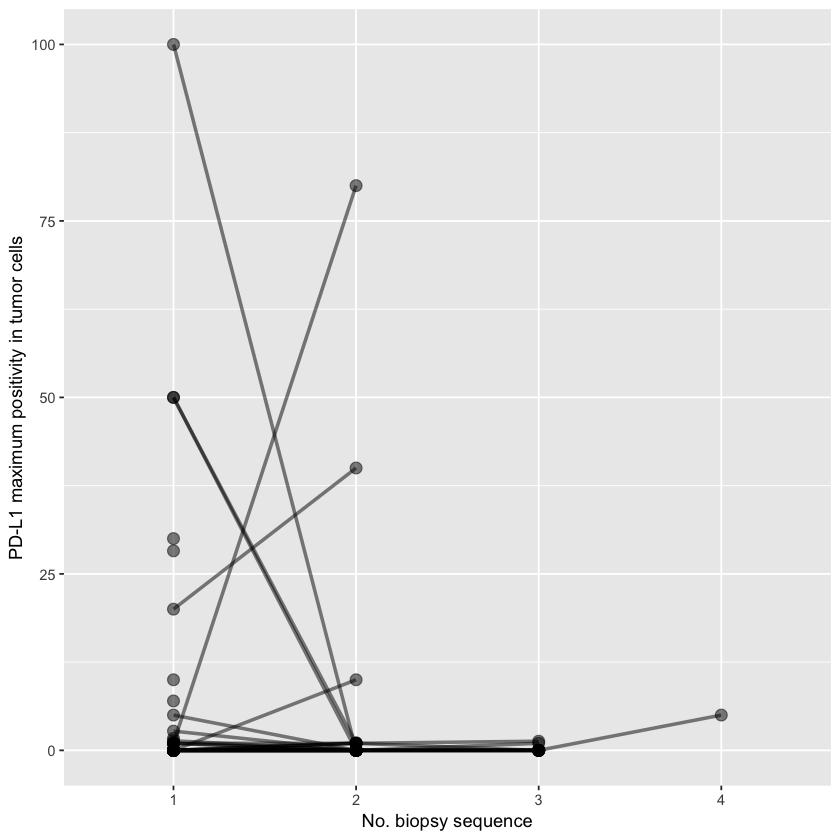

In [33]:
SERIAL %>% plot_serial(biopsy, pdl1_tumor, patient_id) +
    ylab("PD-L1 maximum positivity in tumor cells") +
    xlab("No. biopsy sequence")

### PD-L1 H-scores in tumor cells

In [34]:
SERIAL %>% 
    ungroup() %>% 
    mutate(biopsy = factor(biopsy)) %>% 
    summary_bi(pdl1_tumor_h, biopsy)

# A tibble: 4 x 9
  Levels     N  Mean     SD Median   IQR   Min   Max Missing
  <fct>  <int> <dbl>  <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 1         42 12.4  37.0        0  3.22     0 200         2
2 2         34  7.49 26.2        0  1        0 120         5
3 3         15  0.3   0.779      0  0        0   2.6       3
4 4          1  5    NA          5  0        5   5         0

	Kruskal-Wallis rank sum test

data:  x by y
Kruskal-Wallis chi-squared = 6.1804, df = 3, p-value = 0.1032


	Pairwise comparisons using Wilcoxon rank sum test 

data:  x and y 

  1    2    3   
2 1.00 -    -   
3 0.44 1.00 -   
4 1.00 0.70 0.28

P value adjustment method: bonferroni 


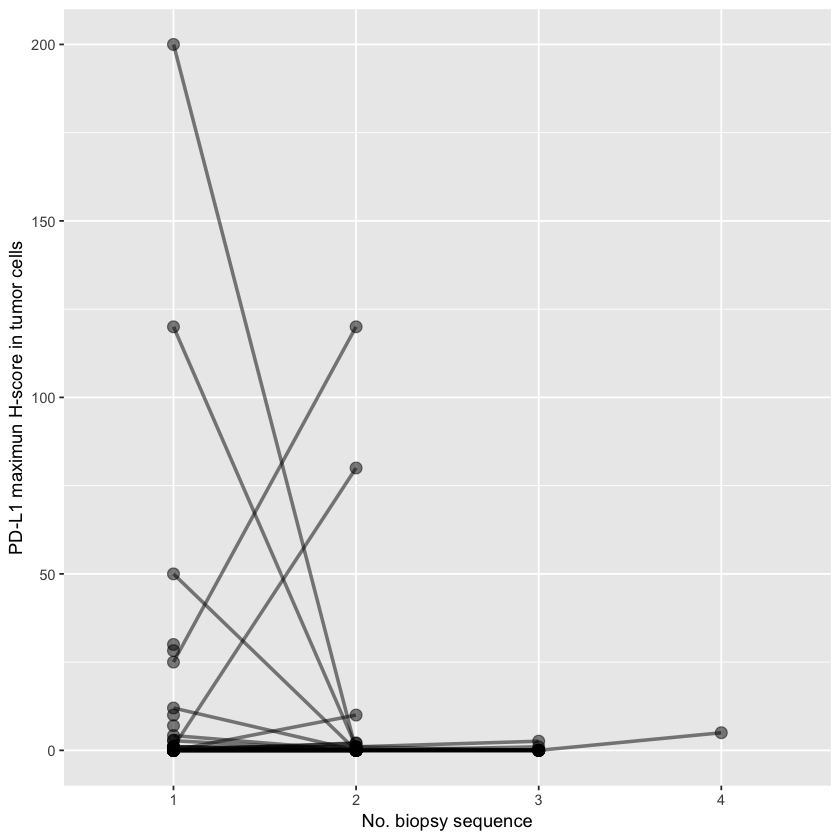

In [35]:
SERIAL %>% plot_serial(biopsy, pdl1_tumor_h, patient_id) +
    ylab("PD-L1 maximun H-score in tumor cells") +
    xlab("No. biopsy sequence")

### PD-L1 positivity in stromal cells

In [36]:
SERIAL %>% 
    ungroup() %>% 
    mutate(biopsy = factor(biopsy)) %>% 
    summary_bi(pdl1_stroma, biopsy)

# A tibble: 4 x 9
  Levels     N  Mean    SD Median   IQR   Min   Max Missing
  <fct>  <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 1         42 17.6  25.6     5      35     0    80       7
2 2         34  5.83 10.5     1      10     0    40      10
3 3         15  9.2   9.46    7.5     8     0    30       5
4 4          1  5    NA       5       0     5     5       0

	Kruskal-Wallis rank sum test

data:  x by y
Kruskal-Wallis chi-squared = 4.1654, df = 3, p-value = 0.2441


	Pairwise comparisons using Wilcoxon rank sum test 

data:  x and y 

  1    2    3   
2 0.56 -    -   
3 1.00 0.44 -   
4 1.00 1.00 1.00

P value adjustment method: bonferroni 


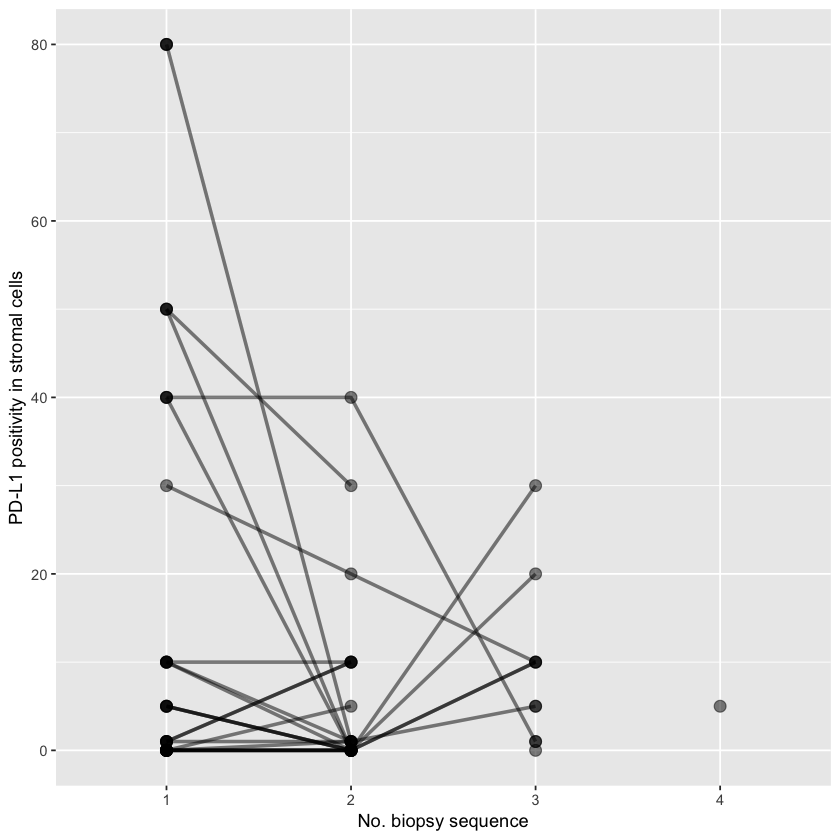

In [37]:
SERIAL %>% plot_serial(biopsy, pdl1_stroma, patient_id) +
    ylab("PD-L1 positivity in stromal cells") +
    xlab("No. biopsy sequence")

### Summary plot

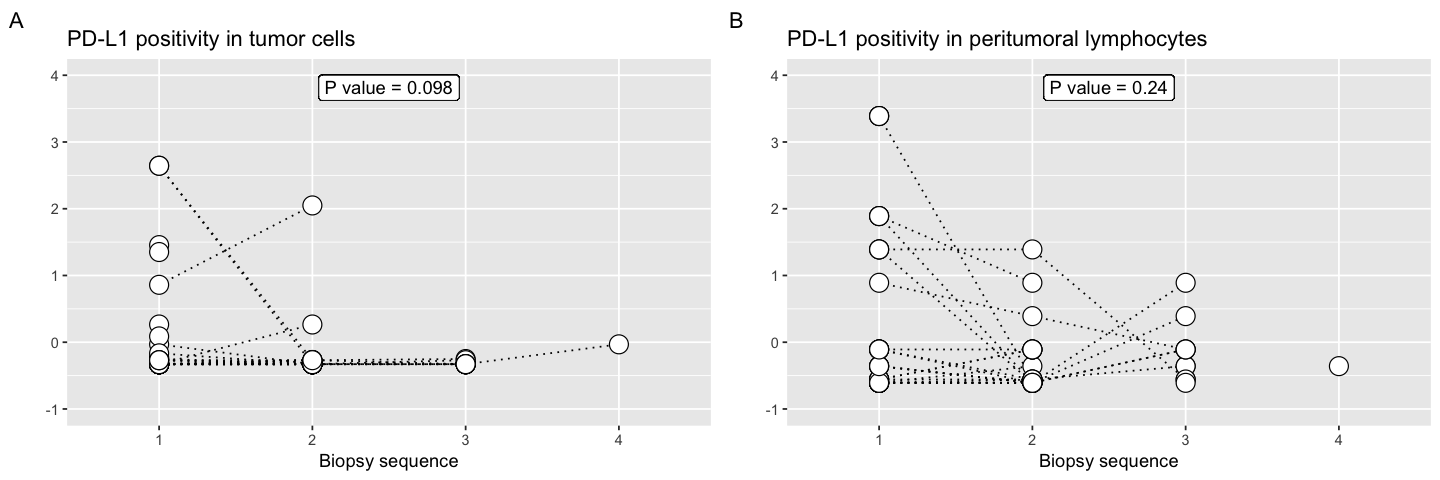

In [38]:
options(repr.plot.width = 12, repr.plot.height = 4)

A <- SERIAL %>% plot_ts(
    biopsy, pdl1_tumor, patient_id,
    labelx = 2.5,
    tag = "A", title = "PD-L1 positivity in tumor cells"
) +
    xlab("Biopsy sequence")

B <- SERIAL %>% plot_ts(
    biopsy, pdl1_stroma, patient_id,
    labelx = 2.5,
    tag = "B", title = "PD-L1 positivity in peritumoral lymphocytes"
) +
    xlab("Biopsy sequence")

Fig_PDL1 <- gridExtra::grid.arrange(
    A, B,
    ncol = 2
)

ggsave(
  filename = "PFCK-NMIBUC-Fig3-R1.tiff",
  plot = Fig_PDL1,
  width = 12,
  height = 4,
  units = "in"
)